## <font color=blue >MC-ANN demo.
This notebook demos how to train the MC-ANN model on the CSV dataset files of ***Stevens Creek*** reservoir sensor. If you want to run it on other sensors, just change the parameter of ***--stream_sensor*** and ***--rain_sensor***.

In our dataset, the parameters should be set to:

reservoir Almaden:
--stream_sensor **reservoir_stor_4001_sof24** 
--rain_sensor **reservoir_stor_4001_sof24** 

reservoir Coyote:
--stream_sensor **reservoir_stor_4005_sof24** 
--rain_sensor **reservoir_stor_4005_sof24** 

reservoir Lexington:
--stream_sensor **reservoir_stor_4007_sof24** 
--rain_sensor **reservoir_stor_4007_sof24** 

reservoir Stevens Creek:
--stream_sensor **reservoir_stor_4009_sof24** 
--rain_sensor **reservoir_stor_4009_sof24**
    
reservoir Vasona:
--stream_sensor **reservoir_stor_4011_sof24** 
--rain_sensor **reservoir_stor_4011_sof24**    


## <font color=blue >Parameter setting. 

--**stream_sensor**: stream dataset file name. The file should be csv file.

--**rain_sensor**: rain dataset file name. The file should be csv file.

--**train_volume**: train set size.

--**hidden_dim**: hidden dim of lstm layers.

--**atten_dim**: hidden dim of attention layers.

--**layer**: number of layers.
    
--**os_s**: oversampling steps.

--**os_v**: oversampling frequency.

--**oversampling**: ratio of training data with extreme points.
    
--**watershed**: 1 if trained with rain info, else 0.

--**model**: model name, used to generate the pt file and predicted file names.

--**mode**: set it to 'train' or 'inference' with an existing pt_file.

--**pt_file**: if set, the model will be loaded from this pt file, otherwise check the file according to the assigned parameters.

--**save**: if save the predicted file of testset, set to 1, else 0.

--**outf**: default value is './output', the model will be saved in the train folder in this directory.

## <font color=blue >Train a *uni-variate* model without rain data.

In [1]:
!python run.py \
  --train_volume 3000 \
  --hidden_dim 512 \
  --atten_dim 600 \
  --layer 1 \
  --stream_sensor reservoir_stor_4009_sof24 \
  --rain_sensor reservoir_stor_4009_sof24 \
  --os_s 18 \
  --os_v 4 \
  --seq_weight 0.4 \
  --oversampling 40 \
  --input_len 360 \
  --output_len 72 \
  --model  Stevens_Creek

for sensor  reservoir_stor_4009_sof24 start_num is:  155567
train set length is :  236664
mean is:  -0.0023255666261028274
std is  3.2069081891016236
gm3.means are:  [ 6.79314905e-04 -1.37106783e-01  2.15363686e+00]
z :  -0.137106782510682 0.000679314904959321 2.153636859268983
gm3.covariances are:  [[[1.27704092e-06]]

 [[6.41153819e-01]]

 [[4.42200547e+01]]]
gm3.weights are:  [0.71500881 0.26814578 0.01684541]
data_prob3 shape,  (236664, 3)
gmm0.means are:  [ 6.81397744e-04  2.30456764e+00 -1.36654595e-01]
gmm0.weights are:  [0.71437435 0.01653175 0.2690939 ]
new order is,  0 1 2
data_prob3 shape,  (236664, 3)
sensor_data_norm1,  [[ 3.12551999e-01  7.33978093e-01  0.00000000e+00  8.25351011e-03
   9.91746485e-01]
 [-6.16691940e-01  7.33922422e-01  0.00000000e+00  8.01089965e-03
   9.91989076e-01]
 [-2.05080531e-01  7.33633041e-01  0.00000000e+00  6.88707270e-03
   9.93112922e-01]
 ...
 [ 7.25174058e-04  2.85226941e-01  9.99471009e-01  3.72583145e-06
   5.25244337e-04]
 [ 7.25174058e

## <font color=blue >Load a trained multi-variate model.

In [1]:
import numpy as np
import random
import imp
from utils.utils2 import *
from run import Options
from models.Group_GMM5 import *
pt = './output/Stevens_Creek/train/Stevens_Creek.zip'
# get model
model = Options().get_model(pt)

current dir:  /data/hydro/hydro-2/code/MCANN
Importing parameters from:  opt.txt ............


/home/yanhong/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


norm is:  [-2.32556663e-03  3.20690819e+00  0.00000000e+00  1.00000000e+00]


## <font color=blue >Use test_single to do inferencing on one time-point.

test_point is:  2018-12-16 13:30:00
RMSE:  2.1783353980387554
MAPE:  0.002556754398399504


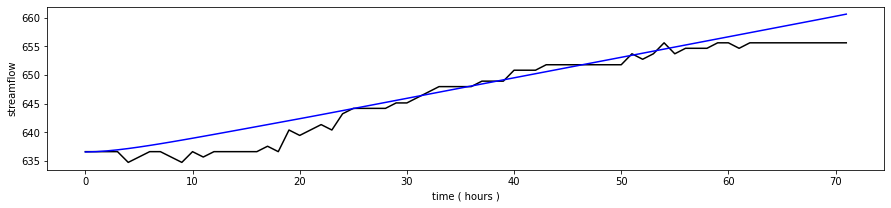

In [3]:
import numpy as np
from utils.utils2 import *
testP=["2018-12-16 13:30:00" ] 
predicted, ground_truth = model.test_single(testP[0])
print("RMSE: ", RMSE(predicted, ground_truth))
print("MAPE: ", MAPE(predicted, ground_truth))
plot(ground_truth, predicted)

## <font color=blue >Inferencing for real-world application.
If you already have test time point, history stream input and rain data input prepared, use ***predict*** function to do it.

In [5]:
import numpy as np
import random
from utils.utils2 import *
from run import Options
from models.Group_GMM5 import *
from models.Inference import *
opt = Options().parse()
# model name
pt = './output/Stevens_Creek/train/Stevens_Creek.zip'
# get model
model = Options().get_model(pt)
# get data
testP=["2020-02-16 00:30:00"]   
for i in range(len(testP)):
    stream_data, indicator_data, pre_gt = model.get_data(testP[i])  
    p = model.predict(testP[i], stream_data, indicator_data, pre_gt)
    print("Predicted data: ")
    print(p)

current dir:  /data/hydro/hydro-2/code/MCANN
Importing parameters from:  opt.txt ............
norm is:  [-2.32556663e-03  3.20690819e+00  0.00000000e+00  1.00000000e+00]


/home/yanhong/anaconda3/lib/python3.8/site-packages/torch/nn/modules/rnn.py:62: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


test_point is:  2020-02-16 00:30:00
Predicted data: 
[1667.25004971 1667.53296587 1667.96689419 1668.49931822 1669.09967523
 1669.75018296 1670.43867314 1671.15573324 1671.89397048 1672.64778053
 1673.41301622 1674.18663728 1674.96644594 1675.75081188 1676.53854051
 1677.32874698 1678.12077426 1678.91415424 1679.70851652 1680.50360841
 1681.29924564 1682.09527864 1682.89160276 1683.68814473 1684.48484417
 1685.28166593 1686.0785697  1686.87553616 1687.67254984 1688.4695995
 1689.2666753  1690.06377366 1690.86087999 1691.65800267 1692.45512344
 1693.2522496  1694.04938442 1694.84651847 1695.64365988 1696.44080354
 1697.23794858 1698.03509405 1698.83223847 1699.62938227 1700.42652158
 1701.22366696 1702.02080904 1702.81823999 1703.61569235 1704.41316463
 1705.21071801 1706.00837882 1706.80613577 1707.60396435 1708.40184411
 1709.19975613 1709.99769137 1710.79564578 1711.59361098 1712.3915868
 1713.18956978 1713.98755835 1714.78554965 1715.58354142 1716.38153415
 1717.17953094 1717.977524